In [34]:
import numpy as np
import pandas as pd
from ast import literal_eval as le #Abstract syntax trees module. It helps to process strings based on syntax grammar. In order to convert strings to list, we can use literal_eval function
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
path_movies = 'tmdb_5000_movies.csv'
path_credits = 'tmdb_5000_credits.csv'
movies = pd.read_csv(path_movies) #Contains popularity, runtime, genre, etc.
credits = pd.read_csv(path_credits) #Contains info about crew and cast of movie

In [3]:
movies.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1806,26000000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,316002,"[{""id"": 2864, ""name"": ""one-night stand""}, {""id...",en,Accidental Love,A small town waitress gets a nail accidentally...,5.644844,"[{""name"": ""K. JAM Media"", ""id"": 17888}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-02-10,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes you nail love. Sometimes it nails you.,Accidental Love,3.9,95
173,130000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://happyfeettwo.warnerbros.com/index.html,65759,"[{""id"": 3028, ""name"": ""penguin""}, {""id"": 4344,...",en,Happy Feet Two,Mumble the penguin has a problem: his son Erik...,17.773500,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}]",2011-11-17,150406466,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every step counts.,Happy Feet Two,5.8,373
261,110000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,1571,"[{""id"": 279, ""name"": ""usa""}, {""id"": 521, ""name...",en,Live Free or Die Hard,"John McClane is back and badder than ever, and...",48.933370,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2007-06-20,383531464,128.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The old school cop is back!,Live Free or Die Hard,6.4,2089
2999,20000000,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,10426,"[{""id"": 5369, ""name"": ""guard""}, {""id"": 6490, ""...",en,Friday After Next,Craig and Day Day have finally moved out of th...,7.499639,"[{""name"": ""New Line Cinema"", ""id"": 12}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-11-22,33526835,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The party's back in the 'hood!,Friday After Next,6.0,100
553,70000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",http://www.thekingdommovie.com/,4349,"[{""id"": 441, ""name"": ""assassination""}, {""id"": ...",en,The Kingdom,A team of U.S. government agents is sent to in...,26.123705,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2007-08-22,86658558,110.0,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,How do you stop an enemy who isn't afraid to die?,The Kingdom,6.5,513


In [4]:
credits.sample(5)

,movie_id,title,cast,crew
271,1635,The Island,"[{""cast_id"": 5, ""character"": ""Lincoln Six Echo...","[{""credit_id"": ""52fe4306c3a36847f8034e17"", ""de..."
2383,17436,The Informers,"[{""cast_id"": 1, ""character"": ""William"", ""credi...","[{""credit_id"": ""52fe47259251416c7508f45d"", ""de..."
587,2756,The Abyss,"[{""cast_id"": 10, ""character"": ""Virgil 'Bud' Br...","[{""credit_id"": ""52fe436ac3a36847f80528dd"", ""de..."
31,68721,Iron Man 3,"[{""cast_id"": 40, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe47a0c3a368484e0d15cb"", ""de..."
1580,227783,The Nut Job,"[{""cast_id"": 1, ""character"": ""Surly (voice)"", ...","[{""credit_id"": ""52fe4eb29251416c7515f38f"", ""de..."


In [5]:
movies = movies.merge(credits,on='title') #Merging both the datasets

In [6]:
#Columns under consideration: genres, id,keywords,title, overview, cast, crew

movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [7]:
movies.shape

(4809, 7)

In [8]:
movies = movies.dropna() #Removing null values

In [9]:
movies.shape

(4806, 7)

In [10]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [11]:
def get_names(obj):
    l = []
    for i in le(obj):
        l.append(i['name'])
    return l

In [12]:
movies['genres'] = movies['genres'].apply(get_names) #Applying get_names to truncate id and get only names as a list

In [13]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
movies['keywords'] = movies['keywords'].apply(get_names)

In [15]:
movies['keywords'].head()

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
2    [spy, based on novel, secret agent, sequel, mi...
3    [dc comics, crime fighter, terrorist, secret i...
4    [based on novel, mars, medallion, space travel...
Name: keywords, dtype: object

In [16]:
def get_prime_cast(obj):
    l = []
    cnt = 0
    for i in le(obj):
        if cnt<3:
            l.append(i['name'])
            cnt+=1
        else:
            break
    return l

In [17]:
movies['cast'] = movies['cast'].apply(get_prime_cast)

In [18]:
def get_director_crew(obj):
    l = []
    for i in le(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
            break
    return l

In [19]:
movies['crew'] = movies['crew'].apply(get_director_crew)

In [20]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [21]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [22]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [23]:
f=0
for i in movies:
    if(i=='overview' or f==1):
        f=1
        movies[i] = movies[i].apply(lambda x: [j.replace(" ","") for j in x])

In [24]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [25]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']


In [26]:
df = movies[['movie_id','title','tags']]

In [27]:
df['tags'] = df['tags'].apply(lambda x: " ".join(x))

<ipython-input-27-789a1ef76fd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x: " ".join(x))


In [28]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [29]:
df['tags'] = df['tags'].apply(lambda x:x.lower())

<ipython-input-29-f0a9af75070b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x:x.lower())


In [30]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [31]:
mn = []
for i in df['tags']:
    mn.append(len(i))
s = sum(mn)/len(mn)

In [32]:
s # mean length of tags

456.8801498127341

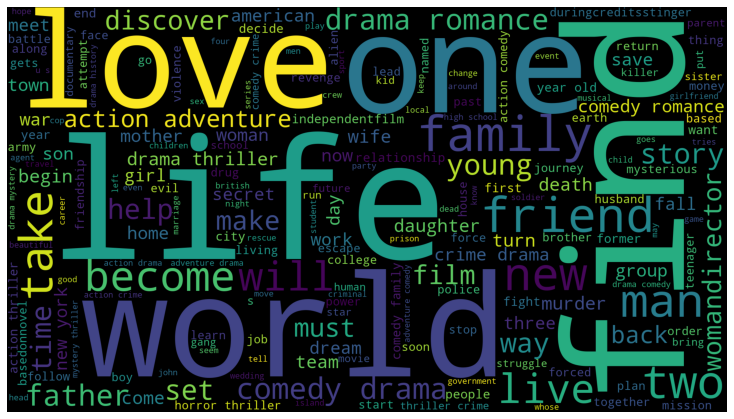

In [35]:
f_text = '. '.join(df['tags'].tolist())
wordcloud = WordCloud(width=1920,height=1080).generate(f_text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [36]:
import nltk #We will do stemming. we will replace words like action,actions to simply action

In [37]:
from nltk.stem.porter import PorterStemmer as Pss
ps = Pss()

In [38]:
def stem(text):
    l = []
    for i in text.split():
        l.append(ps.stem(i))
    return " ".join(l)

In [39]:
df['tags'] = df['tags'].apply(stem)

<ipython-input-39-9c043b76a2e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(stem)


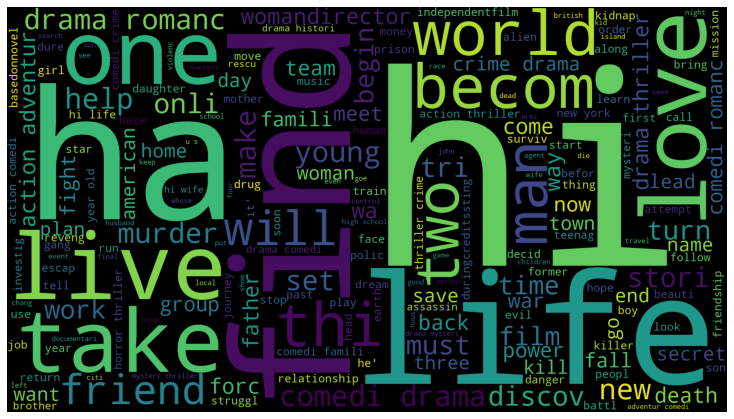

In [40]:
f_text = '. '.join(df['tags'].tolist())
wordcloud = WordCloud(width=1920,height=1080).generate(f_text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [41]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [42]:
df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [43]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cvect = CV(max_features = 2000, stop_words='english')

In [44]:
vectors = cvect.fit_transform(df['tags']).toarray() #converting sparse matrix to numpy 2d array

In [45]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(vectors)

In [49]:
sim[0]

array([1.        , 0.10400629, 0.10400629, ..., 0.05455447, 0.        ,
       0.        ])

In [47]:
def recommend(movie):
    movie_index = df[df['title'] == movie].index[0]
    similar_movies = sorted(list(enumerate(sim[movie_index])),reverse=True,key=lambda x:x[1])[1:6]
    for i in similar_movies:
        print(df.iloc[i[0]].title)

In [48]:
recommend('Avatar')

Aliens vs Predator: Requiem
Falcon Rising
Independence Day
Jupiter Ascending
Titan A.E.


# Modification for front end

In [153]:
import pickle

In [155]:
pickle.dump(df.to_dict(),open('movie.pkl','wb'))

In [156]:
pickle.dump(sim,open('sim.pkl','wb'))